In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from scipy import stats
import glob
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
# Read the training file
df_train_csv = pd.read_csv('files/train.csv')

In [3]:
# Extract the individual subjects from training set
df_train_csv_subjects = list(dict(df_train_csv['Subject'].value_counts()).keys())

In [4]:
list_of_dfs = [] # To store the dataframes

def parse_subject_files(subject,all_files):
    '''
    Input: Subject in the train file and all the instances(files) of that subject
    
    1. Loop through all the files(instances) of the subject present the subject folder
    2. Validating the subject in the train file.
    3. Add the list of dataframes into list_of_dfs
    
    '''
    print(subject,' : started processing.....')
    
    for filename in all_files:
        df = pd.read_csv(filename, header=None)
        if filename.split(sep='/')[7] in list(df_train_csv['Datafile'].str
                                                                      .partition('/')[2]):
            current_label = (df_train_csv[df_train_csv['Datafile']==
                                          (''.join([subject,'/',filename.split(sep='/')[7]]))]
                                          ['Label'].values[0])
            df['Label'] = current_label
            df['Subject'] = subject
            list_of_dfs.append(df)
            
    print(subject,' : completed processing')

In [5]:
# Loop through each subject in the train file and call the parse_subject_files definition
for i in range(len(df_train_csv_subjects)):
    path = r'/Users/rohitanand/Documents/bbdc2019/files/'+df_train_csv_subjects[i]
    all_files = glob.glob(path + "/*.csv")
    parse_subject_files(df_train_csv_subjects[i],all_files)

Subject06  : started processing.....
Subject06  : completed processing
Subject12  : started processing.....
Subject12  : completed processing
Subject13  : started processing.....
Subject13  : completed processing
Subject07  : started processing.....
Subject07  : completed processing
Subject02  : started processing.....
Subject02  : completed processing
Subject19  : started processing.....
Subject19  : completed processing
Subject17  : started processing.....
Subject17  : completed processing
Subject03  : started processing.....
Subject03  : completed processing
Subject09  : started processing.....
Subject09  : completed processing
Subject05  : started processing.....
Subject05  : completed processing
Subject04  : started processing.....
Subject04  : completed processing
Subject18  : started processing.....
Subject18  : completed processing
Subject11  : started processing.....
Subject11  : completed processing
Subject08  : started processing.....
Subject08  : completed processing
Subjec

In [6]:
# Concat all the files in a single frame
df_train_main = pd.concat(list_of_dfs, axis=0)

In [7]:
# Rename the columns
# A 'ground truth' column named as Label has been added as our y-variable
df_train_main.columns = ['EMG1',
                'EMG2',
                'EMG3',
                'EMG4',
                'Airborne',
                'ACC upper X',
                'ACC upper Y',
                'ACC upper Z',
                'Goniometer X',
                'ACC lower X',
                'ACC lower Y',
                'ACC loewr Z',
                'Goniometer Y',
                'Gyro upper X',
                'Gyro upper Y',
                'Gyro upper Z',
                'Gyro lower X',
                'Gyro lower Y',
                'Gyro lower Z',
                'Label',
                'Subject']

In [8]:
df_train_main.shape

(16367293, 21)

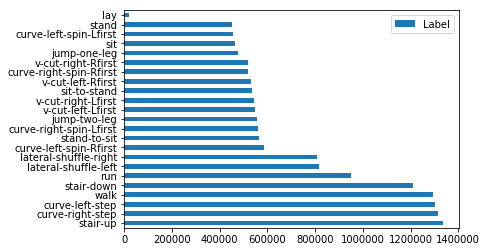

In [11]:
pd.DataFrame(df_train_main['Label'].value_counts()).plot(kind='barh')

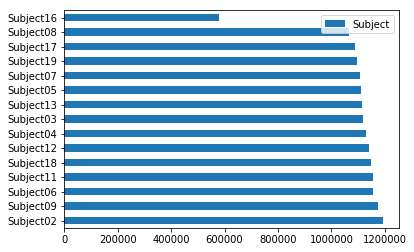

In [12]:
pd.DataFrame(df_train_main['Subject'].value_counts()).plot(kind='barh')

In [ ]:
#df_train_main.groupby(['Subject','Label']).mean()

In [ ]:
# Due to time constraint I did it after PCA or else it would have taken huge time to run
# Removing outliers as it is affected by PCA
# z_scores = stats.zscore(df_train_main)
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# df_train_main = df_train_main[filtered_entries]

In [9]:
df_train_main.shape

(16367293, 21)

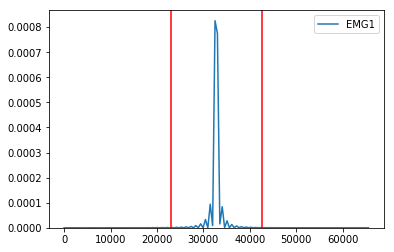

In [15]:
sns.kdeplot(df_train_main['EMG1'])
plt.axvline(np.percentile(df_train_main['EMG1'],99.7),c='r')
plt.axvline(np.percentile(df_train_main['EMG1'],0.3),c='r')

In [72]:
df_train_main.head()

,EMG1,EMG2,EMG3,EMG4,Airborne,ACC upper X,ACC upper Y,ACC upper Z,Goniometer X,ACC lower X,ACC lower Y,ACC loewr Z,Goniometer Y,Gyro upper X,Gyro upper Y,Gyro upper Z,Gyro lower X,Gyro lower Y,Gyro lower Z,Label
0,32766,32729,32591,33025,32663,33164,36236,29920,34634,33154,36440,30132,30464,28813,29148,28940,31124,28428,28488,9
1,32826,32841,32786,33149,32151,33164,36236,29920,34634,33154,36440,30132,30464,28813,29148,28940,31124,28428,28488,9
2,32835,32821,32720,33196,32128,33164,36236,29920,34634,33154,36440,30132,30464,28813,29148,28940,31124,28428,28488,9
3,32846,32737,32909,33091,32527,33164,36236,29920,34634,33154,36440,30132,30464,28813,29148,28940,31124,28428,28488,9
4,32809,32815,32733,33251,32799,33164,36236,29920,34634,33154,36440,30132,30464,28813,29148,28940,31124,28428,28488,9


In [67]:
df_train_main.drop(columns=['Subject'],inplace=True)

In [69]:
df_train_main.shape

(16367293, 20)

In [70]:
label_encoder = LabelEncoder()
df_train_main['Label'] = label_encoder.fit_transform(df_train_main['Label'])

In [71]:
df_train_main['Label'].value_counts()

15    1335642
5     1314535
2     1302041
22    1294866
14    1209882
11     952449
8      814618
9      809713
1      586029
17     565988
3      559998
7      555570
18     549470
20     542863
13     535591
19     533000
4      519170
21     518442
6      475162
12     466631
0      455310
16     450823
10      19500
Name: Label, dtype: int64

In [73]:
#Filtering data 1 SD away from the mean just to reduce max number of rows possible 
z_scores = stats.zscore(df_train_main)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 1).all(axis=1)
df_train_main = df_train_main[filtered_entries]

In [74]:
df_train_main.shape

(1921598, 20)

In [75]:
df_train_main.head()

,EMG1,EMG2,EMG3,EMG4,Airborne,ACC upper X,ACC upper Y,ACC upper Z,Goniometer X,ACC lower X,ACC lower Y,ACC loewr Z,Goniometer Y,Gyro upper X,Gyro upper Y,Gyro upper Z,Gyro lower X,Gyro lower Y,Gyro lower Z,Label
80,32647,33287,32387,32951,32446,33312,37240,30720,34320,33212,36772,31384,30429,30664,34668,30425,30800,24420,31200,9
81,32656,32727,32567,32711,32971,33312,37240,30720,34320,33212,36772,31384,30429,30664,34668,30425,30800,24420,31200,9
82,32808,30963,32921,32919,33303,33312,37240,30720,34320,33212,36772,31384,30429,30664,34668,30425,30800,24420,31200,9
83,32903,30500,33116,33090,31770,33312,37240,30720,34320,33212,36772,31384,30429,30664,34668,30425,30800,24420,31200,9
84,32888,30830,33420,32958,35641,33312,37240,30720,34320,33212,36772,31384,30429,30664,34668,30425,30800,24420,31200,9


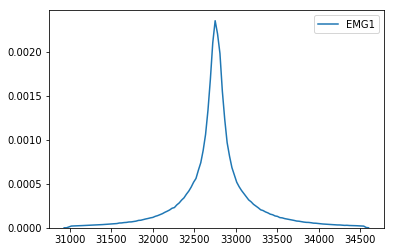

In [77]:
sns.kdeplot(df_train_main['EMG1'])

In [78]:
x = df_train_main.iloc[:,:-1].values
y = df_train_main.iloc[:,19].values

In [79]:
y = y.reshape(-1,1)

In [80]:
onehotencoder = OneHotEncoder(categories='auto')
y = onehotencoder.fit_transform(y).toarray()

In [91]:
# Splitting the data into train-test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

array([0.11626747, 0.21527556, 0.29998453, 0.37892281, 0.44265133,
       0.49981659, 0.55366315, 0.60664978, 0.65923583, 0.71168032,
       0.76355875, 0.81186794, 0.85524164, 0.89427078, 0.92703065,
       0.95028402, 0.97202926, 0.99128073])

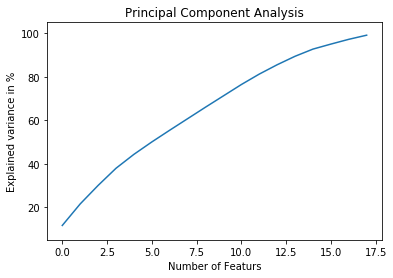

In [92]:
# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 'mle')
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.xlabel('Number of Featurs')
plt.ylabel('Explained variance in %')
plt.ylim(5,105)
plt.title('Principal Component Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(var)

explained_variance.cumsum()

array([0.11729015, 0.21716912, 0.30262318, 0.3822558 , 0.44654487,
       0.50421296, 0.55853315, 0.61198585])

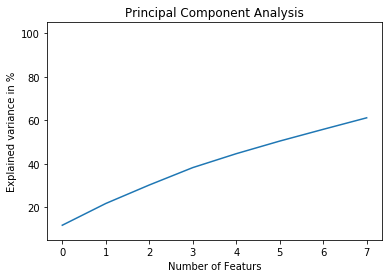

In [93]:
# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 8) #to see the variance 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.xlabel('Number of Featurs')
plt.ylabel('Explained variance in %')
plt.ylim(5,105)
plt.title('Principal Component Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(var)

explained_variance.cumsum()
# Selecting n_components = 8 as it explains approx 60% of variance in dataset

In [131]:
#x_train.shape
#x_test.shape
#y_train.shape
#y_test.shape

(384320, 11)

In [56]:
# df = np.concatenate([x,y],axis =1)

In [79]:
# # Reshaping dataframe for outlier removal
# x_train_df = pd.DataFrame(x_train)
# x_test_df = pd.DataFrame(x_test)
# print(df_train_main.shape)
# df_outliers_x = pd.concat([x_train_df,x_test_df],axis=0,ignore_index=True)
# print(df_outliers_x.shape)
# df_y=pd.DataFrame(y)
# print(df_y.shape)
# df_outliers_x_y = pd.concat([df_outliers_x,df_y],axis=1,ignore_index=True)
# print(df_outliers_x_y.shape)

In [111]:
# # sns.heatmap(df_outliers.corr(),annot=True, fmt="g", cmap='viridis', )
# # plt.figure(figsize=(15, 10))

# grid_kws = {"height_ratios": (5, .05), "hspace": .3}
# f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
# ax = sns.heatmap(pd.DataFrame(df_train_main).corr(), annot=True, ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"})

In [112]:
# There is almost no/minimal correlation between columns
format(2.5e-16,'.20f')

'0.00000000000000025000'

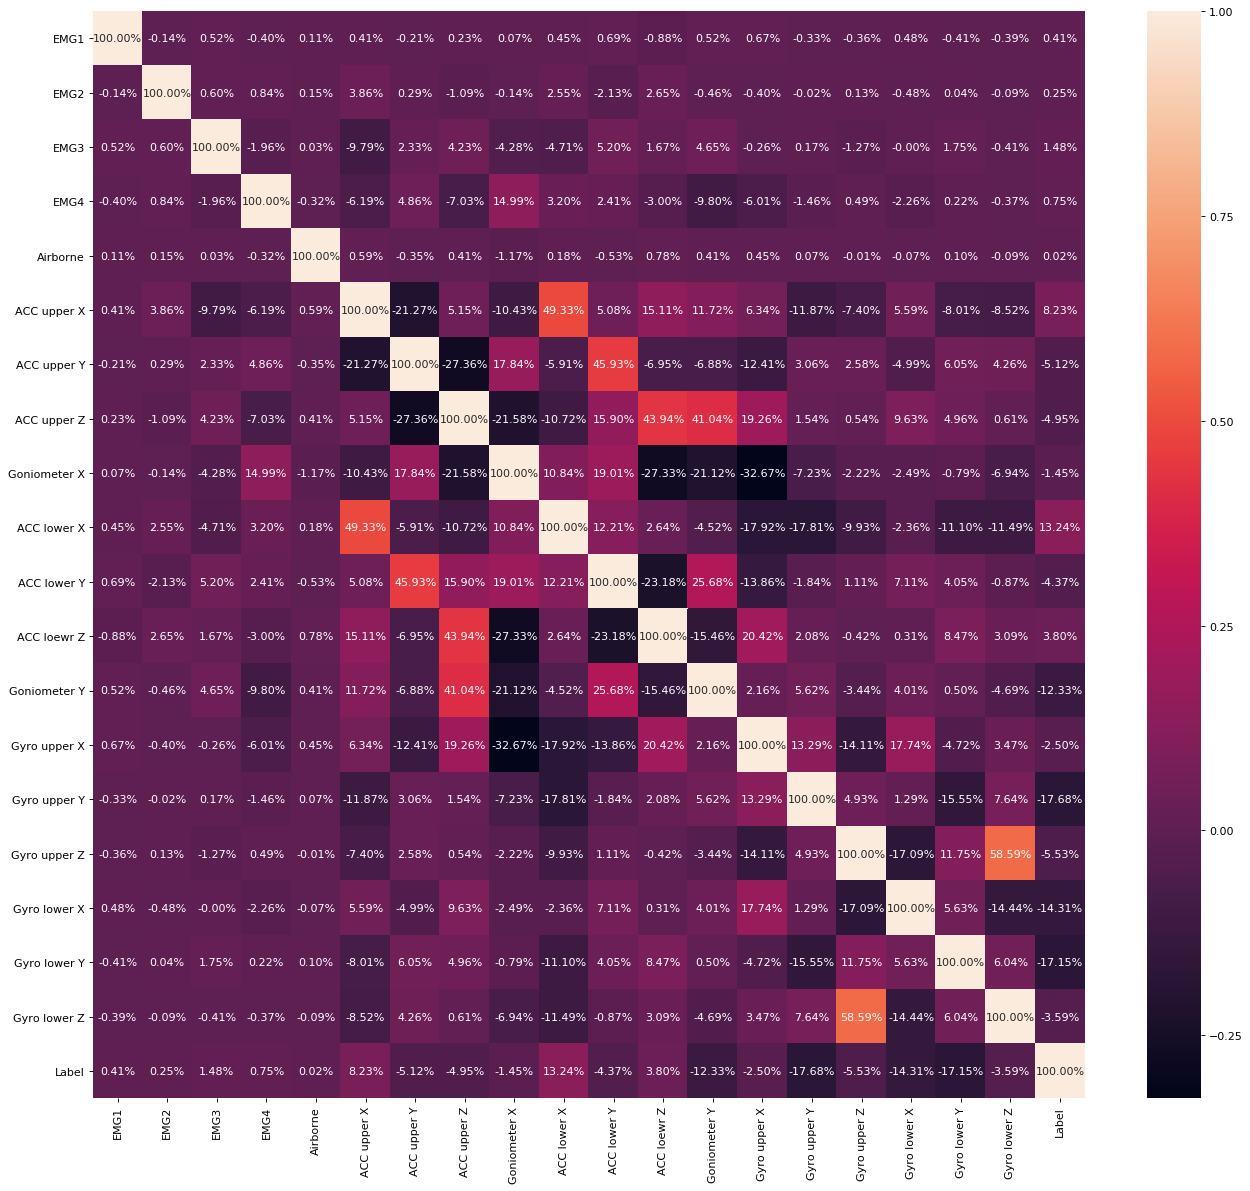

In [118]:
figure(num=None, figsize=(20, 18), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df_train_main.corr(), annot=True, fmt=".2%")

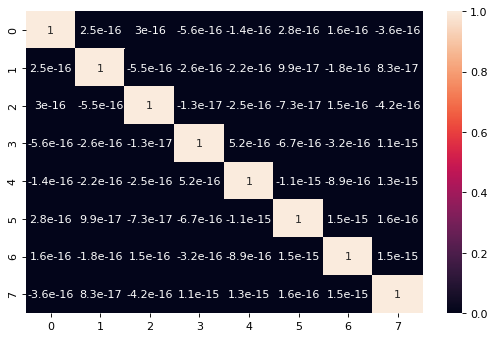

In [124]:
# after PCA we found 8 columns which can be selected 
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(pd.DataFrame(x_train).corr(), annot=True)